# Box Office Collections Analysis

This notebook analyzes the distribution of box office collections across the combined Indian movie dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset Standardization

In [25]:
import pandas as pd

# Load datasets
bollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_bollywood_movies.csv')
indian = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_indian_movies_simple_detailed.csv')
tollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_tollywood_movies.csv')

# Standardize column names
columns = ['MovieID','Title','Director','Genre','ReleaseYear','Budget (Crores)',
           'BoxOffice (Crores)','Rating','Duration (minutes)','LeadActor',
           'LeadActress','Language','ProductionCompany']

bollywood = bollywood.rename(columns={
    'movieid': 'MovieID',
    'title': 'Title',
    'director': 'Director',
    'genre': 'Genre',
    'releaseyear': 'ReleaseYear',
    'budget_crores': 'Budget (Crores)',
    'boxoffice_crores': 'BoxOffice (Crores)',
    'rating': 'Rating',
    'duration_minutes': 'Duration (minutes)',
    'leadactor': 'LeadActor',
    'leadactress': 'LeadActress',
    'language': 'Language',
    'productioncompany': 'ProductionCompany'
})[columns]

indian = indian[columns]
tollywood = tollywood[columns]

# Combine all datasets
combined = pd.concat([bollywood, indian, tollywood], ignore_index=True)

combined_unique = combined.sort_values(by='ReleaseYear', ascending=False).drop_duplicates(subset='Title', keep='first')

## Loading and Combining Datasets

In [26]:

# Combine datasets
combined = pd.concat([bollywood, indian, tollywood], ignore_index=True)

# Display first few rows
combined.head()

,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,MOV001,Lagaan,Ashutosh Gowariker,Unknown,2001,50.0,100.0,8.1,224,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions
1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001,50.0,100.0,7.9,210,Shah Rukh Khan,Kajol,Hindi,Dharma Productions
2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016,50.0,215.0,7.9,184,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios
3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017,250.0,1810.0,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works
4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013,50.0,423.0,6.4,141,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment


## Distribution of Box Office Collections

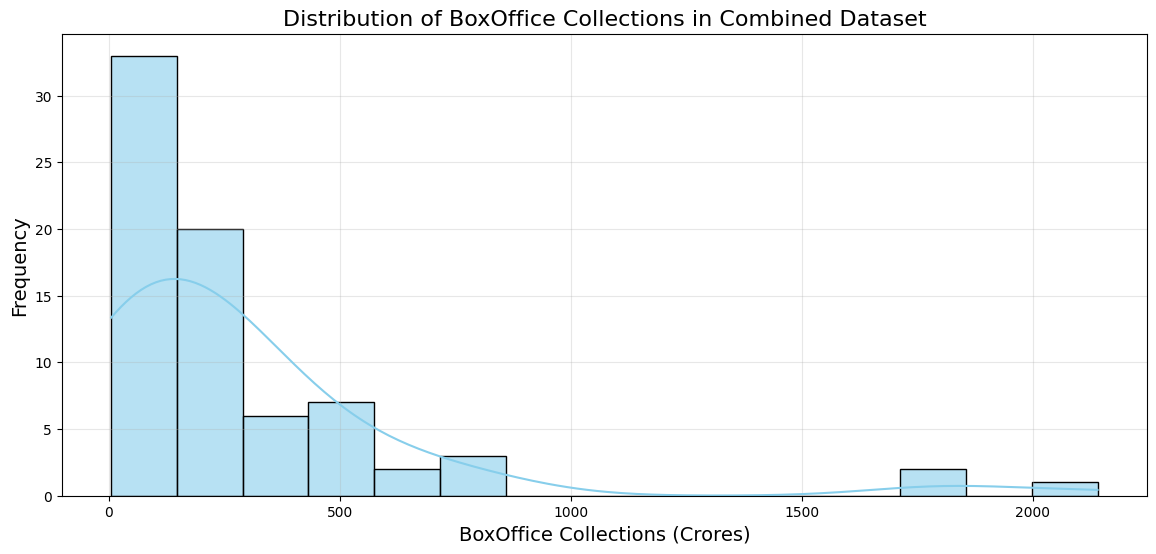

In [27]:
plt.figure(figsize=(14,6))
sns.histplot(combined['BoxOffice (Crores)'], bins=15, kde=True, color='skyblue', edgecolor='black', alpha=0.6)
plt.xlabel('BoxOffice Collections (Crores)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of BoxOffice Collections in Combined Dataset', fontsize=16)
plt.grid(alpha=0.3)
plt.show()

## Identifying Outliers

In [33]:

threshold = 750

## Step 3: Identify outliers (after deduplication)
outliers = combined_unique[combined_unique['BoxOffice (Crores)'] > threshold]
print("Number of outliers:", len(outliers))
print(outliers[['Title', 'BoxOffice (Crores)']])

# Now combined_unique contains all unique movies by title


Number of outliers: 4
                          Title  BoxOffice (Crores)
9                   2.0 (Tamil)               800.0
73  Baahubali 2: The Conclusion              1810.0
6                        Dangal              2140.0
8                            PK               792.0


## Summary Statistics

In [30]:
# Summary statistics
combined['BoxOffice (Crores)'].describe()

count      74.000000
mean      292.472973
std       395.563279
min         5.000000
25%        47.500000
50%       229.500000
75%       332.500000
max      2140.000000
Name: BoxOffice (Crores), dtype: float64

## Box Plot for Better Visualization of Outliers

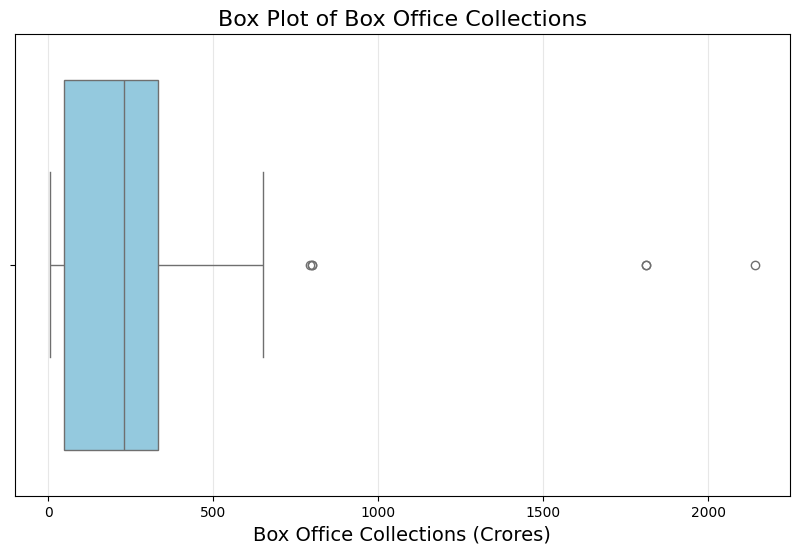

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined['BoxOffice (Crores)'], color='skyblue')
plt.title('Box Plot of Box Office Collections', fontsize=16)
plt.xlabel('Box Office Collections (Crores)', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.show()